In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [2]:
X = np.array(df.iloc[:,2:32].astype(float))
print(X)

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02 ...,   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02 ...,   1.86000000e-01
    2.75000000e-01   8.90200000e-02]
 [  1.96900000e+01   2.12500000e+01   1.30000000e+02 ...,   2.43000000e-01
    3.61300000e-01   8.75800000e-02]
 ..., 
 [  1.66000000e+01   2.80800000e+01   1.08300000e+02 ...,   1.41800000e-01
    2.21800000e-01   7.82000000e-02]
 [  2.06000000e+01   2.93300000e+01   1.40100000e+02 ...,   2.65000000e-01
    4.08700000e-01   1.24000000e-01]
 [  7.76000000e+00   2.45400000e+01   4.79200000e+01 ...,   0.00000000e+00
    2.87100000e-01   7.03900000e-02]]


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["M", "B"])
list(le.classes_)
le.transform(df['diagnosis'])
y = le.transform(df['diagnosis'])

In [5]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
kurts = []
for i in range (1, 31):
    ica = FastICA(n_components=i, whiten=True)
    output =ica.fit_transform(X_scaled)
    kurt = np.average(kurtosis(output))
    kurts.append(kurt)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [6]:
import matplotlib.pyplot as plt
#plt.plot(kurts)
plt.bar(range(1, 31), kurts)
plt.xlabel('Independent Components',fontsize=18)
plt.ylabel('Average Kurtosis',fontsize=18)
plt.title('Breast_Cancer(Average Kurtosis)',fontsize=14)
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
ica = FastICA(n_components=8, whiten=True)
X_ica =ica.fit_transform(X_scaled)

In [8]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_ica)
    Sum_of_squared_distances.append(km.inertia_)

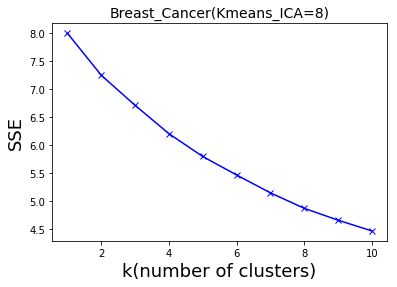

In [19]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k(number of clusters)',fontsize=18)
plt.ylabel('SSE',fontsize=18)
plt.title('Breast_Cancer(Kmeans_ICA=8)',fontsize=14)
plt.show()

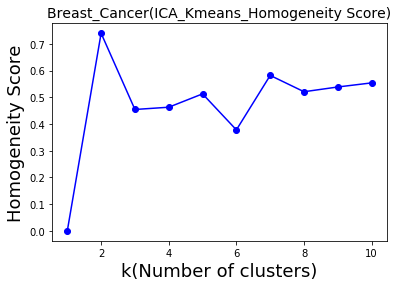

In [10]:
from sklearn import metrics
homogeneity_scores=[]
clusters=range(1,11)
for k in clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(X_ica)
    lable = km.labels_
    homogeneity_scores.append(metrics.homogeneity_score(y,lable ))
plt.plot(clusters, homogeneity_scores,'bo-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Homogeneity Score',fontsize=18)
plt.title('Breast_Cancer(ICA_Kmeans_Homogeneity Score)',fontsize=14)
plt.show()

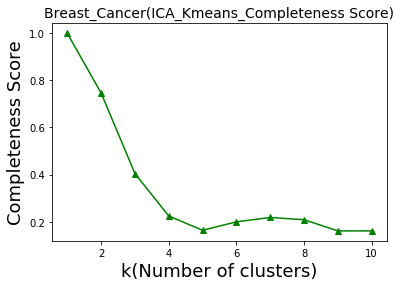

In [11]:
from sklearn import metrics
completeness_scores=[]
clusters=range(1,11)
for k in clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(X_ica)
    lable = km.labels_
    completeness_scores.append(metrics.completeness_score(y,lable ))
plt.plot(clusters, completeness_scores,'g^-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Completeness Score',fontsize=18)
plt.title('Breast_Cancer(ICA_Kmeans_Completeness Score)',fontsize=14)
plt.show()

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
acc = []
accuracy = float
for i in range (1, 21):
    X_pca = FastICA(n_components=i,whiten = True).fit_transform(X_scaled)
    print(X_pca)
    #clf = DecisionTreeClassifier(max_depth=5)
    clf = KMeans(init='k-means++',n_clusters=2)
    clf.fit(X_pca)
    pred = clf.labels_
    if accuracy_score(pred,y) < 0.5:
        accuracyscore = 1 - accuracy_score(pred,y)
    if accuracy_score(pred,y) > 0.5:
        accuracyscore = accuracy_score(pred,y)
    acc.append(accuracyscore)
print(acc)

[[-0.10574701]
 [-0.02746735]
 [-0.06595814]
 [-0.08193673]
 [-0.04526855]
 [-0.02738045]
 [-0.02575431]
 [-0.02465478]
 [-0.03652178]
 [-0.07306539]
 [ 0.00932235]
 [-0.03049613]
 [-0.09415406]
 [-0.00393554]
 [-0.04995124]
 [-0.04688307]
 [-0.00264637]
 [-0.05082125]
 [-0.05692591]
 [ 0.01423018]
 [ 0.0181539 ]
 [ 0.04092074]
 [-0.05444705]
 [-0.04841148]
 [-0.05693659]
 [-0.08165616]
 [-0.04037924]
 [-0.03524641]
 [-0.04609635]
 [-0.01973155]
 [-0.06970299]
 [-0.03338499]
 [-0.05239456]
 [-0.05740788]
 [-0.03434096]
 [-0.03182209]
 [-0.01491043]
 [ 0.04312909]
 [ 0.01148098]
 [-0.00880298]
 [ 0.02474284]
 [ 0.00107361]
 [-0.10454105]
 [-0.01139338]
 [ 0.00337672]
 [-0.06189802]
 [ 0.05270692]
 [-0.01955551]
 [ 0.02457595]
 [ 0.01803102]
 [ 0.04075474]
 [ 0.03632496]
 [ 0.03969165]
 [-0.03798989]
 [ 0.00776028]
 [ 0.03287796]
 [-0.05347536]
 [-0.02504088]
 [ 0.04280867]
 [ 0.04757679]
 [ 0.02744474]
 [ 0.0296654 ]
 [-0.054745  ]
 [ 0.02661992]
 [-0.0194589 ]
 [-0.02084731]
 [ 0.03204

[[ 0.09393303  0.00144069 -0.01698477 -0.0102005   0.12289189 -0.0704255 ]
 [-0.01371478  0.02587614  0.02148521  0.05553446  0.02494652 -0.04255621]
 [ 0.0336392   0.0108535  -0.01336776  0.02494921  0.03251322 -0.05466239]
 ..., 
 [-0.0378027  -0.02660739 -0.01871357  0.05222125 -0.06156821 -0.01731522]
 [ 0.06449006 -0.00863815 -0.11948692  0.02973297 -0.02365535 -0.05239526]
 [ 0.03666119 -0.00205998  0.04523401  0.00372164 -0.08962566  0.05086234]]
[[-0.10654607  0.0714322   0.00381166 ...,  0.09348539  0.1243614
  -0.01916082]
 [-0.03826509 -0.02219494 -0.0230223  ..., -0.01220999  0.03238781
   0.0539533 ]
 [-0.05316797  0.03661077 -0.01385803 ..., -0.01576477  0.01413247
   0.02124514]
 ..., 
 [ 0.04108721 -0.04213513  0.03146445 ..., -0.01190771 -0.00808297
   0.03933303]
 [-0.00508102  0.04876041  0.01526698 ...,  0.07159875  0.00985899
  -0.00885962]
 [ 0.11458358  0.01394259  0.00836279 ...,  0.05704332  0.02455118
   0.03563745]]
[[ 0.01171157  0.0049674  -0.11954003 ..., 

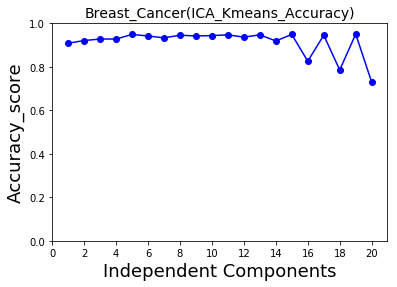

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(range(1, 21), acc,'bo-')
plt.xlabel('Independent Components',fontsize=18)
plt.ylim(0,1)
plt.xticks(np.arange(0, 22, step=2))
plt.ylabel('Accuracy_score',fontsize=18)
plt.title('Breast_Cancer(ICA_Kmeans_Accuracy)',fontsize=14)
plt.show()
plt.clf()

In [14]:
from sklearn.mixture import GaussianMixture as GMM
ll=[]
bic=[]
homogeinity_scores=[]
completeness_scores=[]
clusters=range(1,11)
model = GMM(covariance_type = 'full')
for k in clusters:
            model.set_params(n_components=k)
            model.fit(X_ica)
            labels = model.predict(X_ica)
            ll.append(model.score(X_ica))
            bic.append(model.bic(X_ica))
            homogeinity_scores.append(metrics.homogeneity_score(y,labels))
            completeness_scores.append(metrics.completeness_score(y,labels))
print(bic)

[-15680.195854424812, -16550.494194930343, -16578.720113121242, -16592.442547412978, -16582.083506270355, -16378.905034839194, -16259.781870679068, -16063.29073829245, -15841.043971786339, -15721.081090838179]


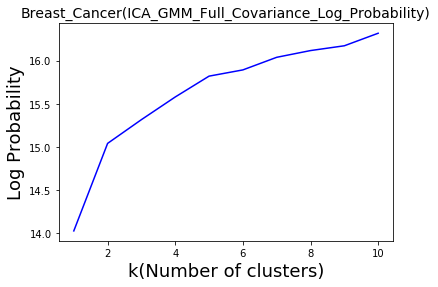

In [15]:
plt.plot(clusters, ll, color='blue')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Log Probability',fontsize=18);
plt.title('Breast_Cancer(ICA_GMM_Full_Covariance_Log_Probability)',fontsize=14)
plt.show()

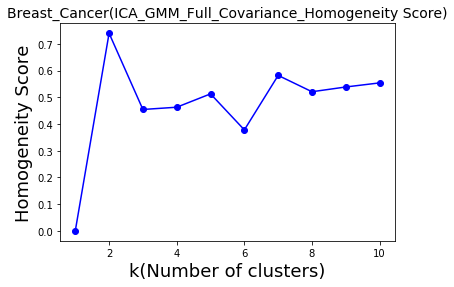

In [16]:
plt.plot(clusters, homogeneity_scores,'bo-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Homogeneity Score',fontsize=18)
plt.title('Breast_Cancer(ICA_GMM_Full_Covariance_Homogeneity Score)',fontsize=14)
plt.show()

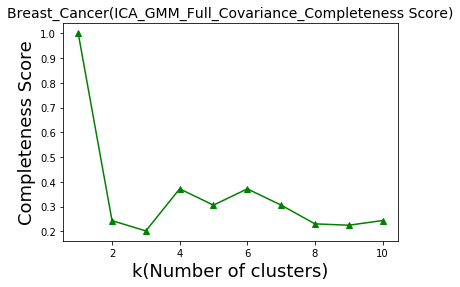

In [17]:
plt.plot(clusters, completeness_scores,'g^-')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('Completeness Score',fontsize=18)
plt.title('Breast_Cancer(ICA_GMM_Full_Covariance_Completeness Score)',fontsize=14)
plt.show()

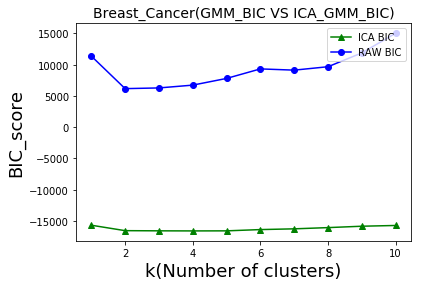

In [18]:
bic2=[11384.689237062925, 6174.7941841756538, 6286.2584335971933, 6735.7435571933156, 7807.6451755694579, 9331.5570355781056, 9133.3432808520811, 9680.4796992095507, 11892.956328863042, 15037.456278903926]
plt.plot(clusters, bic,'g^-',label='ICA BIC')
plt.plot(clusters, bic2,'bo-',label='RAW BIC')
plt.legend(loc='upper right')
plt.xlabel('k(Number of clusters)',fontsize=18)
plt.ylabel('BIC_score',fontsize=18)
plt.title('Breast_Cancer(GMM_BIC VS ICA_GMM_BIC)',fontsize=14)
plt.show()